## Diabetes Prediction Using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diabetes Prediction using Logistic Regression/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
# Check if any column contains Categorical values
# If any Categorical value contains, then we have to do Encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Check if there is any Null value
# If any Null value contains, then we have to replace it with mean, median or mode
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Now we will check the data structure
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **Form the data description, we found some features contain Zero, as their Min Value.**
#### **So we have to replace these values with mean values.**

In [7]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Find Outlier

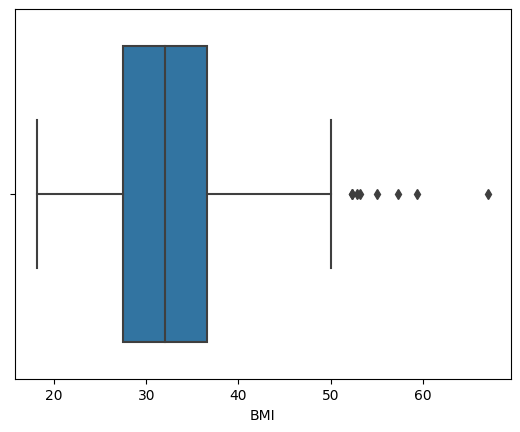

In [15]:
sns.boxplot(x=df['BMI'])
plt.show()

In [18]:
q1 = df["BMI"].quantile(0.25)
q3 = df["BMI"].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print(lower_limit, upper_limit)

13.849999999999998 50.25


In [28]:
(df['BMI'] > lower_limit) & (df['BMI'] < upper_limit)

0      True
1      True
2      True
3      True
4      True
       ... 
763    True
764    True
765    True
766    True
767    True
Name: BMI, Length: 768, dtype: bool

In [37]:
df[(df['BMI'] < lower_limit) | (df['BMI'] > upper_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.000000,56.000000,100.000000,53.2,0.759,25,1
125,1,88.0,30.000000,42.000000,99.000000,55.0,0.496,26,1
177,0,129.0,110.000000,46.000000,130.000000,67.1,0.319,26,1
193,11,135.0,69.105469,20.536458,79.799479,52.3,0.578,40,1
247,0,165.0,90.000000,33.000000,680.000000,52.3,0.427,23,0
303,5,115.0,98.000000,20.536458,79.799479,52.9,0.209,28,1
445,0,180.0,78.000000,63.000000,14.000000,59.4,2.420,25,1
673,3,123.0,100.000000,35.000000,240.000000,57.3,0.880,22,0


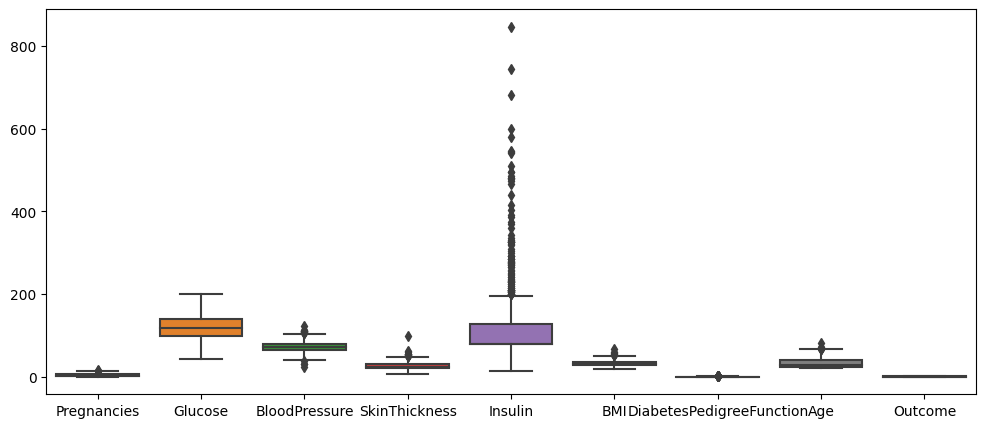

In [45]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.show()

In [46]:
# Split dependent and independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [48]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [50]:
# Train, Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,shuffle=True)

In [49]:
from sklearn.preprocessing import StandardScaler
import pickle

# Standrad Scaling
def standard_scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    file = open('Diabetes Prediction using Logistic Regression/model/standardScaler.pkl', 'wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [51]:
X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test)

In [52]:
X_train_scaled

array([[-0.52639686, -1.25806262, -0.24875152, ..., -0.05130551,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32713796,  0.81650936, ..., -0.5985773 ,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57053938, -2.15757252, ..., -0.52642693,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69285836,  1.1469629 , ...,  1.91225539,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.637034  , -0.24875152, ...,  1.45049306,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10507706,  1.97309676, ..., -1.42109145,
        -0.61552223, -1.03594038]])

In [53]:
# Fit the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [55]:
# Kfold Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [66]:
from sklearn.model_selection import cross_validate
scores = cross_validate(log_reg, X_train_scaled, y_train, cv=kf)
scores

{'fit_time': array([0.00734568, 0.00524831, 0.00414586, 0.00407839, 0.00404096]),
 'score_time': array([0.00135064, 0.00160384, 0.00111198, 0.00096416, 0.00096798]),
 'test_score': array([0.76422764, 0.77235772, 0.80487805, 0.73170732, 0.79508197])}

In [67]:
scores['test_score'].mean()

0.7736505397840864

In [77]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Warning
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3,3,7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

clf = GridSearchCV(log_reg, param_grid=parameters, scoring='accuracy', cv=10)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [78]:
clf.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [79]:
clf.best_score_

0.7686673717609731

In [80]:
log_reg = LogisticRegression(C= 100.0, penalty= 'l2', solver= 'liblinear')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=100.0, solver='liblinear')

In [81]:
y_pred = log_reg.predict(X_test_scaled)

In [82]:
# Find the accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))

0.7727272727272727


In [83]:
print(confusion_matrix(y_test, y_pred))

[[85 14]
 [21 34]]


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [86]:
# Pickle the model
file = open('Diabetes Prediction using Logistic Regression/model/logisticRegression.pkl','wb')
pickle.dump(log_reg, file)
file.close()